In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Hotels_data_Changed.csv")

In [3]:
df.head()

,Unnamed: 0,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,DayDiff,WeekDay,DiscountDiff,DiscountPerc
0,0,1,7/17/2015 0:00,8/12/2015 0:00,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,26,Wednesday,138,88.285229
1,1,1,7/17/2015 0:00,8/19/2015 0:00,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,33,Wednesday,131,88.230009
2,2,1,7/17/2015 0:00,8/13/2015 0:00,5,4370,4240,1,3,The Peninsula New York,5,27,Thursday,130,97.025172
3,3,1,7/17/2015 0:00,7/26/2015 0:00,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,9,Sunday,72,95.859689
4,4,1,7/17/2015 0:00,8/12/2015 0:00,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,26,Wednesday,67,96.147211


In [4]:
DayDiff = pd.read_csv('DayDiff.csv')
DayDiff.head()

,Unnamed: 0,Snapshot Date,Checkin Date,WeekDay
0,0,7/17/2015,8/12/2015,2
1,1,7/17/2015,8/19/2015,2
2,2,7/17/2015,8/13/2015,3
3,3,7/17/2015,7/26/2015,6
4,4,7/17/2015,8/12/2015,2


In [7]:
df["Hotel Name"] = df["Hotel Name"].astype('category')
df["Hotel Name"] = df["Hotel Name"].cat.codes
df.head()

,Unnamed: 0,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,DayDiff,WeekDay,DiscountDiff,DiscountPerc
0,0,1,7/17/2015 0:00,8/12/2015 0:00,5,1178,1040,1,6,35,3,26,Wednesday,138,88.285229
1,1,1,7/17/2015 0:00,8/19/2015 0:00,5,1113,982,1,8,35,3,33,Wednesday,131,88.230009
2,2,1,7/17/2015 0:00,8/13/2015 0:00,5,4370,4240,1,3,482,5,27,Thursday,130,97.025172
3,3,1,7/17/2015 0:00,7/26/2015 0:00,5,1739,1667,1,18,127,4,9,Sunday,72,95.859689
4,4,1,7/17/2015 0:00,8/12/2015 0:00,5,1739,1672,1,3,127,4,26,Wednesday,67,96.147211


In [8]:
data = pd.merge(DayDiff[['Snapshot Date', 'Checkin Date','WeekDay','Unnamed: 0']],df[['DayDiff','Hotel Name','Discount Code','Unnamed: 0']], on ='Unnamed: 0')
data.head()

,Snapshot Date,Checkin Date,WeekDay,Unnamed: 0,DayDiff,Hotel Name,Discount Code
0,7/17/2015,8/12/2015,2,0,26,35,1
1,7/17/2015,8/19/2015,2,1,33,35,1
2,7/17/2015,8/13/2015,3,2,27,482,1
3,7/17/2015,7/26/2015,6,3,9,127,1
4,7/17/2015,8/12/2015,2,4,26,127,1


In [9]:
data.drop(columns = ['Unnamed: 0'], axis=1, inplace = True)
data.head()

,Snapshot Date,Checkin Date,WeekDay,DayDiff,Hotel Name,Discount Code
0,7/17/2015,8/12/2015,2,26,35,1
1,7/17/2015,8/19/2015,2,33,35,1
2,7/17/2015,8/13/2015,3,27,482,1
3,7/17/2015,7/26/2015,6,9,127,1
4,7/17/2015,8/12/2015,2,26,127,1


In [17]:
DayDiff['Snapshot Date'] = pd.to_datetime(df['Snapshot Date'])    
DayDiff['Snapshot_date_delta'] = (DayDiff['Snapshot Date'] - DayDiff['Snapshot Date'].min())  / np.timedelta64(1,'D')
DayDiff['Checkin Date'] = pd.to_datetime(df['Checkin Date'])    
DayDiff['Checkin_date_delta'] = (DayDiff['Checkin Date'] - DayDiff['Checkin Date'].min())  / np.timedelta64(1,'D')
DayDiff.head()

,Unnamed: 0,Snapshot Date,Checkin Date,WeekDay,Snapshot_date_delta,Checkin_date_delta
0,0,2015-07-17,2015-08-12,2,0.0,25.0
1,1,2015-07-17,2015-08-19,2,0.0,32.0
2,2,2015-07-17,2015-08-13,3,0.0,26.0
3,3,2015-07-17,2015-07-26,6,0.0,8.0
4,4,2015-07-17,2015-08-12,2,0.0,25.0


In [18]:
data = pd.merge(DayDiff[['Snapshot_date_delta', 'Checkin_date_delta','WeekDay','Unnamed: 0']],df[['DayDiff','Hotel Name','Discount Code','Unnamed: 0']], on ='Unnamed: 0')
data.drop(columns = ['Unnamed: 0'], axis=1, inplace = True)
data.head()

,Snapshot_date_delta,Checkin_date_delta,WeekDay,DayDiff,Hotel Name,Discount Code
0,0.0,25.0,2,26,35,1
1,0.0,32.0,2,33,35,1
2,0.0,26.0,3,27,482,1
3,0.0,8.0,6,9,127,1
4,0.0,25.0,2,26,127,1


In [20]:
X = data[['Snapshot_date_delta','Checkin_date_delta','DayDiff','WeekDay','Hotel Name']]
Y = data["Discount Code"]

In [21]:
from sklearn.model_selection import train_test_split

# Split our data
train, test, train_labels, test_labels = train_test_split(X, Y ,test_size=0.4,random_state=42)

In [22]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(train, train_labels)

In [23]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(train, train_labels)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf.score(test, test_labels)))

Accuracy of Decision Tree classifier on training set: 0.71
Accuracy of Decision Tree classifier on test set: 0.30


In [24]:
X = data[['Snapshot_date_delta','Checkin_date_delta','DayDiff','WeekDay','Hotel Name']]
Y = data["Discount Code"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# summarize transformed data
np.set_printoptions(precision=3)

In [27]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train,  train_labels)

GaussianNB(priors=None)

In [28]:
print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.30
Accuracy of GNB classifier on test set: 0.30


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
np.set_printoptions(precision=3)

In [31]:
gnb = GaussianNB()
gnb.fit(train,  train_labels)

GaussianNB(priors=None)

In [32]:
print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.30
Accuracy of GNB classifier on test set: 0.30


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=50)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)

In [36]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.65
Accuracy of Decision Tree classifier on test set: 0.28


In [37]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

X = data[['Snapshot_date_delta','Checkin_date_delta','DayDiff','WeekDay','Hotel Name']]
Y = data["Discount Code"]


In [38]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))


In [39]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.335926 (0.009300)
KNN: 0.347488 (0.023458)
CART: 0.415517 (0.030503)
NB: 0.338199 (0.009769)


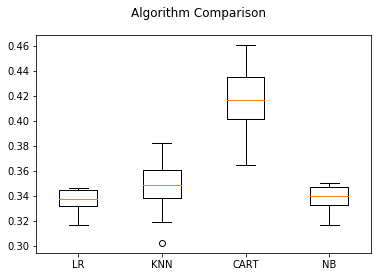

In [40]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [41]:
DayDiff.head()

,Unnamed: 0,Snapshot Date,Checkin Date,WeekDay,Snapshot_date_delta,Checkin_date_delta
0,0,2015-07-17,2015-08-12,2,0.0,25.0
1,1,2015-07-17,2015-08-19,2,0.0,32.0
2,2,2015-07-17,2015-08-13,3,0.0,26.0
3,3,2015-07-17,2015-07-26,6,0.0,8.0
4,4,2015-07-17,2015-08-12,2,0.0,25.0


In [42]:
for index, row in DayDiff.iterrows():
    time = DayDiff['Snapshot Date'][index]
    time = 10000*time.year + 100*time.month + time.day
    DayDiff.at[index, 'SnapshotDate'] = time 
DayDiff.head()

,Unnamed: 0,Snapshot Date,Checkin Date,WeekDay,Snapshot_date_delta,Checkin_date_delta,SnapshotDate
0,0,2015-07-17,2015-08-12,2,0.0,25.0,20150717.0
1,1,2015-07-17,2015-08-19,2,0.0,32.0,20150717.0
2,2,2015-07-17,2015-08-13,3,0.0,26.0,20150717.0
3,3,2015-07-17,2015-07-26,6,0.0,8.0,20150717.0
4,4,2015-07-17,2015-08-12,2,0.0,25.0,20150717.0


In [43]:
for index, row in DayDiff.iterrows():
    time = DayDiff['Checkin Date'][index]
    time = 10000*time.year + 100*time.month + time.day
    DayDiff.at[index, 'CheckinDate'] = time 
DayDiff.head()

,Unnamed: 0,Snapshot Date,Checkin Date,WeekDay,Snapshot_date_delta,Checkin_date_delta,SnapshotDate,CheckinDate
0,0,2015-07-17,2015-08-12,2,0.0,25.0,20150717.0,20150812.0
1,1,2015-07-17,2015-08-19,2,0.0,32.0,20150717.0,20150819.0
2,2,2015-07-17,2015-08-13,3,0.0,26.0,20150717.0,20150813.0
3,3,2015-07-17,2015-07-26,6,0.0,8.0,20150717.0,20150726.0
4,4,2015-07-17,2015-08-12,2,0.0,25.0,20150717.0,20150812.0


In [46]:
dataN = pd.merge(DayDiff[['SnapshotDate', 'CheckinDate','WeekDay','Unnamed: 0']],df[['DayDiff','Hotel Name','Discount Code','Unnamed: 0']], on ='Unnamed: 0')
dataN.drop(columns = ['Unnamed: 0'], axis=1, inplace = True)
dataN.head()

,SnapshotDate,CheckinDate,WeekDay,DayDiff,Hotel Name,Discount Code
0,20150717.0,20150812.0,2,26,35,1
1,20150717.0,20150819.0,2,33,35,1
2,20150717.0,20150813.0,3,27,482,1
3,20150717.0,20150726.0,6,9,127,1
4,20150717.0,20150812.0,2,26,127,1


In [48]:
for index, row in dataN.iterrows():
    cat = dataN['Hotel Name'][index]
    cat = cat*2
    dataN.at[index, 'Hotel Name'] = cat 
dataN.head()

,SnapshotDate,CheckinDate,WeekDay,DayDiff,Hotel Name,Discount Code
0,20150717.0,20150812.0,2,26,70,1
1,20150717.0,20150819.0,2,33,70,1
2,20150717.0,20150813.0,3,27,964,1
3,20150717.0,20150726.0,6,9,254,1
4,20150717.0,20150812.0,2,26,254,1


In [53]:
X = dataN[['SnapshotDate','CheckinDate','DayDiff','WeekDay','Hotel Name']]
Y = dataN["Discount Code"]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [57]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [58]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.321009 (0.011634)
KNN: 0.354371 (0.023908)
CART: 0.416219 (0.030206)
NB: 0.331773 (0.018404)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
from sklearn.tree import DecisionTreeClassifier
"""
Train the model
"""
tree = DecisionTreeClassifier(criterion = 'entropy').fit(X_train ,y_train)

In [65]:
"""
Predict the classes of new, unseen data
"""
prediction = tree.predict(X_test)

In [66]:
"""
Check the accuracy
"""
print("The prediction accuracy is: ",tree.score(X_test,y_test)*100,"%")

The prediction accuracy is:  28.327158127848044 %


In [67]:
dataN.to_csv('Hotels_data.csv')

In [69]:
X = dataN[['SnapshotDate','CheckinDate','DayDiff','WeekDay','Hotel Name']]
y = dataN["Discount Code"]

In [79]:
from sklearn.model_selection import train_test_split

# Split our data
train, test, train_labels, test_labels = train_test_split(X, y ,test_size=0.5,random_state=65)

In [80]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(train, train_labels)

In [81]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(train, train_labels)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf.score(test, test_labels)))

Accuracy of Decision Tree classifier on training set: 0.75
Accuracy of Decision Tree classifier on test set: 0.32


In [82]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,  y_train)

GaussianNB(priors=None)

In [83]:
print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.33
Accuracy of GNB classifier on test set: 0.33


In [84]:
X = dataN[['SnapshotDate','CheckinDate','DayDiff','WeekDay','Hotel Name']]
Y = dataN["Discount Code"]

In [85]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
 
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.35, random_state = 0)

C:\Users\naama.zecharia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [96]:
dtree = DecisionTreeClassifier(criterion = "entropy", random_state = 70,max_depth=4, min_samples_leaf=3)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=70,
            splitter='best')

In [97]:
y_predict = dtree.predict(X_test)

accuracy_score(y_test, y_predict)

0.34200800036503565

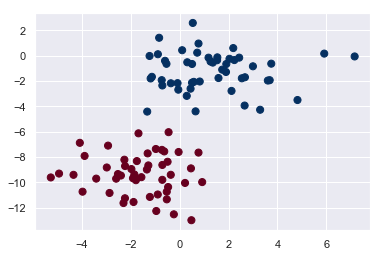

In [98]:
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [102]:
probs = dtree.predict_proba(X_test)

In [103]:
probs = probs[:, 1]